In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit

 
# from google.colab import files
import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler
# from sklearn.metrics import mean_squared_error  ## To calculate the loss
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import learning_curve, validation_curve

Set the defaults for your plots.


# Import and shuffle data

# 1.Import data

In [2]:
# k = []
# for i in range(1,81):
#         k += ["a{}".format(i)]
# k += ["Label"] 

# c = {"0":k[0]}
# for i in range(1,81):
#     c.update({"0.{}".format(i):k[i]})


df = pd.read_csv('test_data(py).csv', index_col=0)  #, keep_date_col=True)
#df = df.rename(columns = c)
#df.rename(index = "d")
df = shuffle(df)

df

FileNotFoundError: [Errno 2] File test_data(py).csv does not exist: 'test_data(py).csv'

In [43]:
X = df.drop('Label', axis=1).values
#X = df[['a4','a75']].values
Y = df['Label'].values


X_train, X_test, Y_train, Y_test = train_test_split(
                                          X  , Y, 
                                          random_state = 0 , 
                                          test_size = .2, shuffle=True
                                          )

print('Our train set has: {}'.format( dict( Counter(Y_train) ) ))
print('Our test set has: {}'.format(  dict( Counter(Y_test) ) ))
print('And in total, the whole set has: {}'.format(  dict( Counter( Y ) ) ))

Our train set has: {1.0: 2817, 0.0: 1705}
Our test set has: {0.0: 411, 1.0: 720}
And in total, the whole set has: {1.0: 3537, 0.0: 2116}


# Traning classifications for model

# 1.Train and metrics

we train models and compute metrics

In [44]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

# def clf_with_thrshld(clf,thrshld=0):
#     try:
#         def new_clf(X):
#             return (clf.decision_function(X)> thrshld)

#         return new_clf
#     except e:
#         print("This clf has no decision function.")

ts = 0.6 ## Threshold for the classification


In [ ]:
#Before fine tuning
names = [
         "Nearest Neighbors",
         "Linear SVM", 
         "RBF SVM", 
         " poly_9 svm",
         "Decision Tree",
         "Random Forest",
         "AdaBoost",
         "Naive Bayes",
         "QDA"
            ]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(C=1,gamma =14),
    SVC(kernel="poly",degree = 9,C = 0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
    ]
# iterate over classifiers
for name, clf in zip(names, classifiers):
    


    #training the model and compute metrics
    start = timeit.default_timer()
    clf.fit(X_train, Y_train)
    stop = timeit.default_timer()
    print('Time_train: ', stop - start)
    
    start = timeit.default_timer()
    score = clf.score(X_test, Y_test)
    stop = timeit.default_timer()
    print('Time_predict: ', stop - start)

    print('{} classifier can achieve a accuracy as high as {} on the test data.'.format(name,score))

    print(f"Here is the confusion matrix for the {name}: \n {confusion_matrix(Y, clf.predict(X))}"  )
    print(f"The recall for the {name}: \n {recall_score(Y, clf.predict(X), pos_label=0)}" )
    print(f"The precision for the {name}: \n {precision_score(Y, clf.predict(X), pos_label = 0)}"  )
    clf_report = classification_report(Y_test, clf.predict(X_test))  #classification_report
    print(clf_report)
    print('\n')
    
    plot_confusion_matrix(clf, X_test, Y_test, normalize='true')
    plt.show()

In [35]:
#after fine tuning
names = [
         "Nearest Neighbors",
         "Linear SVM", 
         "RBF SVM", 
         " poly_9 svm",
         "Decision Tree",
         "Random Forest",
         "AdaBoost",
         "Naive Bayes",
         "QDA"
            ]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.015 , gamma =11),
    SVC(C=1,gamma =14),
    SVC(kernel="poly",degree = 9,C = 0.015,gamma = 11),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators= 100,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2)),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(reg_param=0.1)
    ]


In [ ]:

for name, clf in zip(names, classifiers):
    


    #training the model and compute metrics
    start = timeit.default_timer()
    clf.fit(X_train, Y_train)
    stop = timeit.default_timer()
    print('Time_train: ', stop - start)
    
    start = timeit.default_timer()
    score = clf.score(X_test, Y_test)
    stop = timeit.default_timer()
    print('Time_predict: ', stop - start)

    print('{} classifier can achieve a accuracy as high as {} on the test data.'.format(name,score))

    print(f"Here is the confusion matrix for the {name}: \n {confusion_matrix(Y, clf.predict(X))}"  )
    print(f"The recall for the {name}: \n {recall_score(Y, clf.predict(X), pos_label=0)}" )
    print(f"The precision for the {name}: \n {precision_score(Y, clf.predict(X), pos_label = 0)}"  )
    clf_report = classification_report(Y_test, clf.predict(X_test))  #classification_report
    print(clf_report)
    print('\n')
    
    plot_confusion_matrix(clf, X_test, Y_test, normalize='true')
    plt.show()


# 2.Learning curve

we plot the learning curve and analys it that have enogh data and compute the bias and variance

In [37]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes = [10,50,100,200,500,1000,2000,3000,4000,4500]

for name, clf in zip(names, classifiers):
    
    #training the model
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    
    #plotting learning curve
    scoring = 'f1'
    ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = clf, X = X,
                                                   y = Y, train_sizes = train_sizes, cv =10,
                                                   scoring = scoring)
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean =- validation_scores.mean(axis = 1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    
    plt_title = 'Learning Curve \n {}'.format(name)
    xlabel = 'Size of data'
    ylabel = 'accuracy_loss'

    fig = plt.figure()
    ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
    ax.plot(ns_list, train_scores_mean, label = 'Training Score')
    ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')
    plt.fill_between(ns_list, train_scores_mean - train_scores_std,
              train_scores_mean + train_scores_std, alpha=0.2,
              color="darkblue", lw=2)
    plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                  validation_scores_mean + validation_scores_std, alpha=0.2,
                  color="darkgreen", lw=2)
    ax.legend(loc=0)
    #plt.yscale('log')
    print("bias{}".format(name),validation_scores_mean[-1] )
    plt.show()

# 3.Validation curve

we plot the validation curve to find optimal value

In [45]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import f1_score
import  sklearn.metrics

In [ ]:

#KNN
k_list = range(10)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X, Y, 
                                              param_name="n_neighbors",
                                              param_range=k_list , cv=20, 
                                              scoring = 'accuracy',
                                              verbose=1, n_jobs=-2
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = '# Neighbours, k'
ylabel = 'accuracy'

plt_title = 'Validation curve for Classification with KNN'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(k_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(k_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(k_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(k_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

In [ ]:
#Decision Tree
depth_list = range(25)

train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X, Y, 
                                              param_name="max_depth",
                                              param_range=depth_list , cv=20, 
                                              scoring = 'accuracy',
                                              verbose=1, n_jobs=-2
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'max depth (# question)'
ylabel = 'accuracy'

plt_title = 'Validation curve for Calssification with Decision Tree'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(depth_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(depth_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(depth_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(depth_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

In [ ]:
#random Forest
estimator_list = range(50)

train_scores, valid_scores = validation_curve(RandomForestClassifier(), X, Y, 
                                              param_name="n_estimators",
                                              param_range= estimator_list , cv=20, 
                                              scoring = 'accuracy',
                                              verbose=1, n_jobs=-2
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = '# estimator (# Trees)'
ylabel = 'accuracy'

plt_title = 'Validation curve for Calssification with Random Forest'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(estimator_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(estimator_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(estimator_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(estimator_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

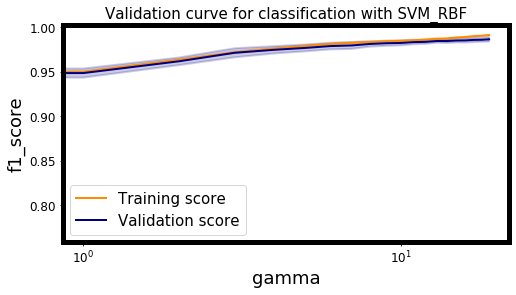

In [49]:
#SVM_RBF_gamma
scoring = 'f1'
gamma =range(0,20)

train_scores, valid_scores = validation_curve(SVC(kernel = 'rbf'), X, Y, 
                                              param_name="gamma",
                                              param_range=gamma , cv=5, 
                                              scoring = scoring
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'gamma'
ylabel = 'f1_score'

plt_title = 'Validation curve for classification with SVM_RBF'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(gamma, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(gamma, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(gamma, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(gamma, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

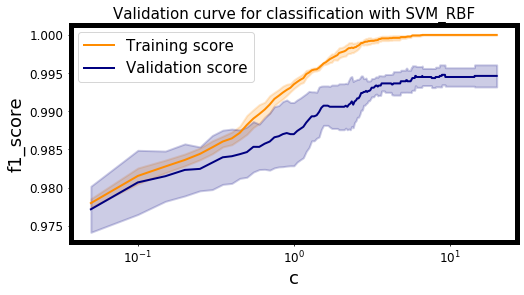

In [18]:
#SVM_RBF_C
c =np.arange(0,20,0.05)

train_scores, valid_scores = validation_curve(SVC(kernel = 'rbf'), X, Y, 
                                              param_name="C",
                                              param_range=c , cv=5, 
                                              scoring = scoring
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'c'
ylabel = 'f1_score'

plt_title = 'Validation curve for classification with SVM_RBF'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(c, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(c, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(c, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(c, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()


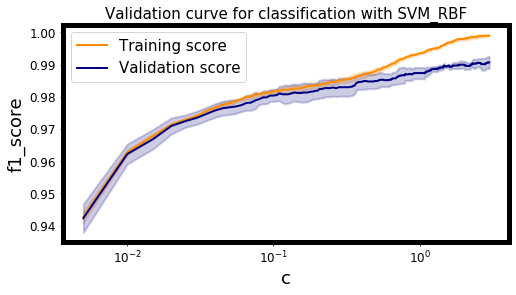

In [46]:
#SVM_RBF_C
c =np.arange(0,3,0.005)

train_scores, valid_scores = validation_curve(SVC(kernel = 'rbf'), X, Y, 
                                              param_name="C",
                                              param_range=c , cv=5, 
                                              scoring = scoring
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'c'
ylabel = 'f1_score'

plt_title = 'Validation curve for classification with SVM_RBF'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(c, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(c, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(c, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(c, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()


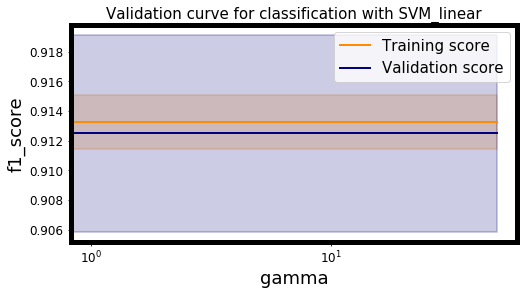

In [19]:
#SVM_linear_gamma
scoring = 'f1'
gamma =range(0,50)

train_scores, valid_scores = validation_curve(SVC(kernel = 'linear'), X, Y, 
                                              param_name="gamma",
                                              param_range=gamma , cv=5, 
                                              scoring = scoring
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'gamma'
ylabel = 'f1_score'

plt_title = 'Validation curve for classification with SVM_linear'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(gamma, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(gamma, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(gamma, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(gamma, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()


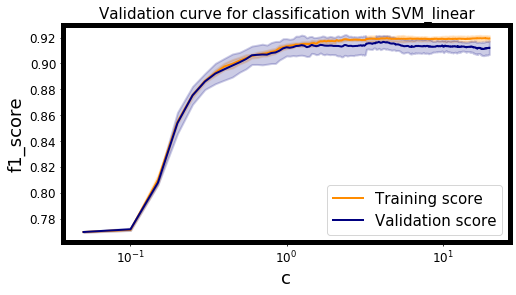

In [20]:
#SVM_linear_C
c =np.arange(0,20,0.05)

train_scores, valid_scores = validation_curve(SVC(kernel = 'linear'), X, Y, 
                                              param_name="C",
                                              param_range=c , cv=5, 
                                              scoring = scoring
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'c'
ylabel = 'f1_score'

plt_title = 'Validation curve for classification with SVM_linear'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(c, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(c, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(c, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(c, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()


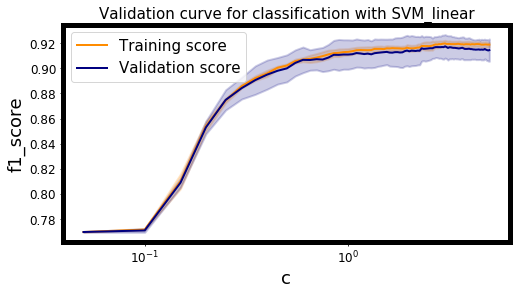

In [48]:
#SVM_linear_C
c =np.arange(0,5,0.05)

train_scores, valid_scores = validation_curve(SVC(kernel = 'linear'), X, Y, 
                                              param_name="C",
                                              param_range=c , cv=5, 
                                              scoring = scoring
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'c'
ylabel = 'f1_score'

plt_title = 'Validation curve for classification with SVM_linear'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(c, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(c, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(c, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(c, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()


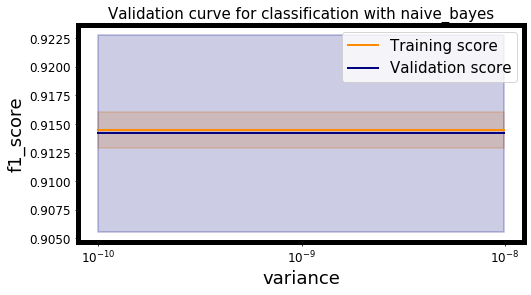

In [51]:
#naive_bayes
var = np.arange(10**-10,10**-8,10**-10)
train_scores, valid_scores = validation_curve(GaussianNB(), X, Y, 
                                              param_name="var_smoothing",
                                              param_range=var , cv=10, 
                                              scoring = scoring,
                                               n_jobs=-1
                                             )

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =  np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'variance'
ylabel = 'f1_score'

plt_title = 'Validation curve for classification with naive_bayes'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(var, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(var, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(var, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(var, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()


# 4.Tuning the model

we tuning models to find the optimal values

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
scoring = 'f1'

In [15]:
%%time
#KNN
params = {'n_neighbors':k_list}
knn = KNeighborsRegressor()
reg_gs = GridSearchCV(knn, param_grid=params, n_jobs=-1, verbose=1, cv=50, scoring=scoring)
reg_gs.fit(X, Y)
print( reg_gs.best_params_ )

Fitting 50 folds for each of 9 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.3min finished


{'n_neighbors': 5}
Wall time: 2min 16s


In [ ]:
%%time
##Decision Tree
depth_list = range(20)
params = {'max_depth': depth_list}
estimator = DecisionTreeClassifier()
reg_gs = GridSearchCV(estimator, param_grid=params, n_jobs=-2, verbose=1, cv=50, scoring='accuracy')
reg_gs.fit(X, Y)
print( reg_gs.best_params_ )

In [ ]:
%%time
#random forest
depth_list = range(1,41)
params = {'max_depth': depth_list , 'n_estimators':range(1,41)}
estimator = RandomForestClassifier()
reg_gs = RandomizedSearchCV(estimator, param_distributions=params, n_iter=15, n_jobs=-2, verbose=1, cv=25, scoring='accuracy')
reg_gs.fit(X, Y)
print( reg_gs.best_params_ )

SVM


In [64]:
%%time
#svm_ linear

svc_l_reg = SVC(kernel="linear")
params = {
          'gamma':[11,12,13,14],
          'C':[.015,.02,.04], 
         }

svc_l_reg_gs = GridSearchCV(svc_l_reg, param_grid=params, n_jobs=-1, verbose=1, cv=5,scoring =scoring )
svc_l_reg_gs.fit(X, Y)
print("svm_ linear", svc_l_reg_gs.best_params_)
print(svc_l_reg_gs.best_score_)

#svm_ poly

svc_p_reg = SVC(kernel="poly")
params = {
          'degree':[9],'gamma':[11,12,13,14],
          'C':[.015,.02,.04,0.5,1], 
         }

svc_p_reg_gs = GridSearchCV(svc_p_reg, param_grid=params, n_jobs=-1, verbose=1, cv=5,scoring =scoring)
svc_p_reg_gs.fit(X, Y)
print("svm_ poly",svc_p_reg_gs.best_params_)
print(svc_p_reg_gs.best_score_)

#svm_ RBF

svc_R_reg = SVC(kernel="rbf")
params = {
          'gamma':[11,12,13,14],
          'C':[.015,.02,.04,1.0], 
         }

svc_R_reg_gs = GridSearchCV(svc_R_reg, param_grid=params, n_jobs=-1, verbose=1, cv=5,scoring =scoring)
svc_R_reg_gs.fit(X, Y)
print("svm_ RBF",svc_R_reg_gs.best_params_)
print(svc_R_reg_gs.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.7min finished


svm_ linear {'C': 0.015, 'gamma': 11}
0.7697496734654983
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.3min finished


svm_ poly {'C': 0.015, 'degree': 9, 'gamma': 11}
0.7697496734654983
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


svm_ RBF {'C': 1.0, 'gamma': 14}
0.9839329371692334
Wall time: 12min 32s


In [22]:
%%time
QDA = QuadraticDiscriminantAnalysis()
QDA.get_params()

params = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]


QDA_gs = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid=params,cv =5,scoring =scoring)
QDA_gs.fit(X, Y)
print(QDA_gs.best_params_)
print(QDA_gs.best_score_)



{'reg_param': 0.1}
0.7697496734654983
Wall time: 3.56 s
Parser   : 125 ms


In [24]:
%%time
ADA = AdaBoostClassifier()
ADA.get_params()
param_grid = [
    { 

        'n_estimators': [50, 100],
        'learning_rate': np.logspace(-1, 1, 3),
        'base_estimator': [
            DecisionTreeClassifier(max_depth=1),
            DecisionTreeClassifier(max_depth=2)
        ]
    }
]

ADA_gs = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, cv=5,scoring =scoring)
ADA_gs.fit(X, Y)
print(ADA_gs.best_params_)
print(ADA_gs.best_score_)

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 1.0, 'n_estimators': 100}
0.9933736012283741
Wall time: 6min 50s


In [ ]:
#naive bayes
%%time
NB = GaussianNB()
NB.get_params()
